<a href="https://colab.research.google.com/github/y-jacobs/MonetizeArt/blob/main/Selections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Random Selection

In [ ]:
import os
import random
import shutil

src_folder = '/content/drive/MyDrive/deep_learning_project/data/monet_jpg'
dst_folder = '/content/drive/MyDrive/deep_learning_project/data/monet_jpg_random'

files = os.listdir(src_folder)
random_files = random.sample(files, 30)

for file in random_files:
    src_path = os.path.join(src_folder, file)
    dst_path = os.path.join(dst_folder, file)
    shutil.copy2(src_path, dst_path)

In [ ]:
len(random_files)

In [ ]:
############################################
images_path = "/content/drive/MyDrive/deep_learning_project/data/monet_jpg_random/"
image_list = os.listdir(images_path)
images = []
labels = []
for img_name in tqdm(image_list):
    images.append(read_image(img_name, images_path))
    labels.append(extract_image_index_make_label(img_name))
images_array = np.array(images)
labels = np.array(labels)
print(images_array.shape, labels.shape)

100%|██████████| 35/35 [00:00<00:00, 305.52it/s]

(35, 256, 256, 3) (35,)


###Color Selection

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from skimage import io
import shutil

# Load images from folder
image_list = []
filenames = []
folder = '/content/drive/MyDrive/deep_learning_project/data/monet_jpg/'
for filename in os.listdir(folder):
    img = io.imread(os.path.join(folder, filename))
    if img is not None:
        image_list.append(img)
        filenames.append(filename)

# Convert list of images to numpy array
images = np.array(image_list)

# Flatten the images
n_samples, height, width, depth = images.shape
X = images.reshape(n_samples, height * width * depth)

# Scale the data to zero mean and unit variance
X = StandardScaler().fit_transform(X)

# Perform K-Means clustering with 30 clusters
kmeans = KMeans(n_clusters=30, random_state=0).fit(X)

==========================CLASS 0 ===========================


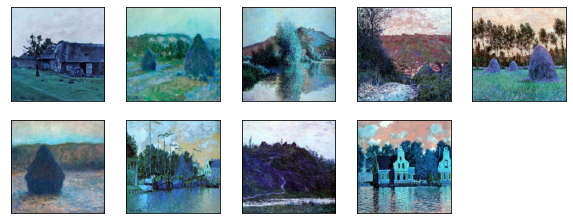

==========================CLASS 1 ===========================


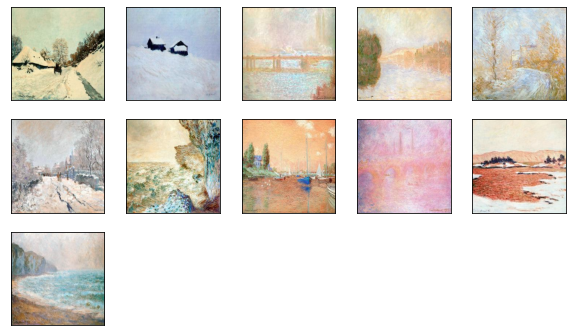

==========================CLASS 2 ===========================


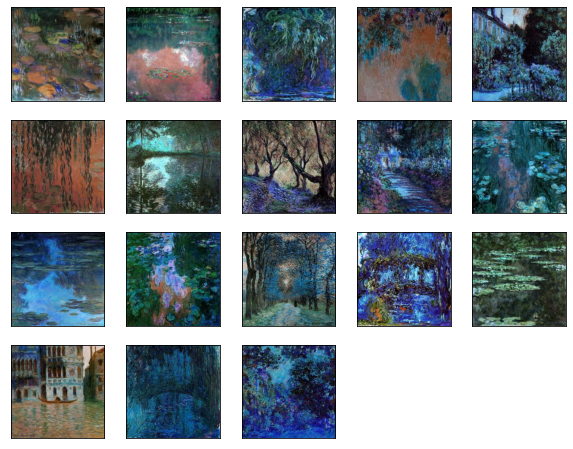

==========================CLASS 3 ===========================


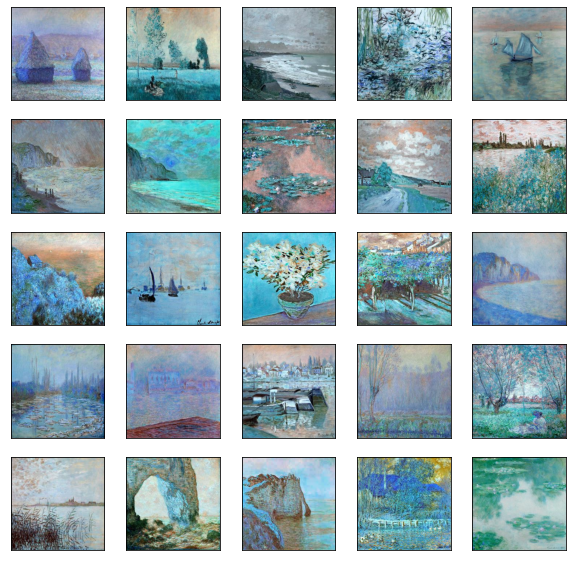

==========================CLASS 4 ===========================


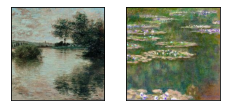

==========================CLASS 5 ===========================


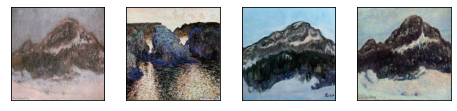

==========================CLASS 6 ===========================


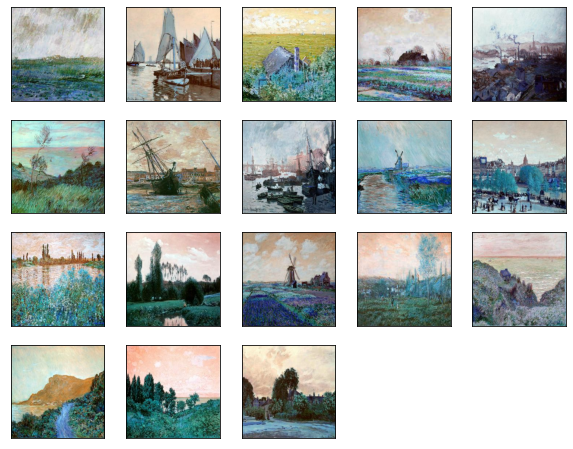

==========================CLASS 7 ===========================


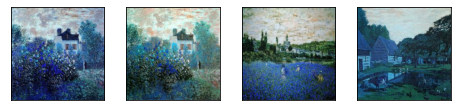

==========================CLASS 8 ===========================


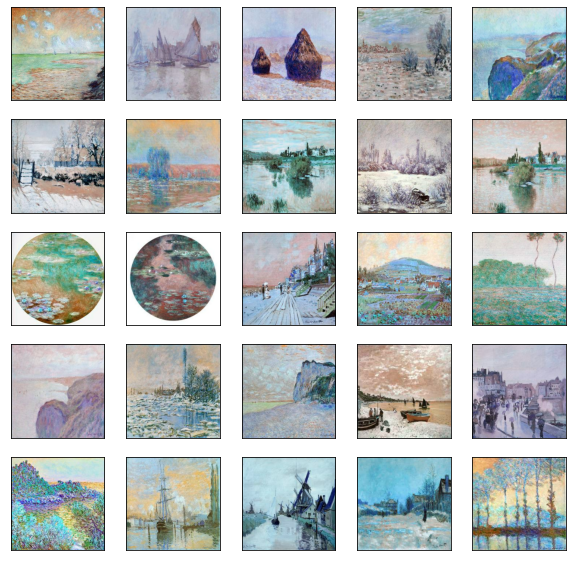

==========================CLASS 9 ===========================


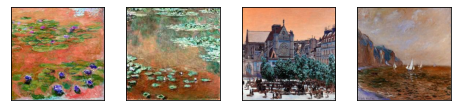

==========================CLASS 10 ===========================


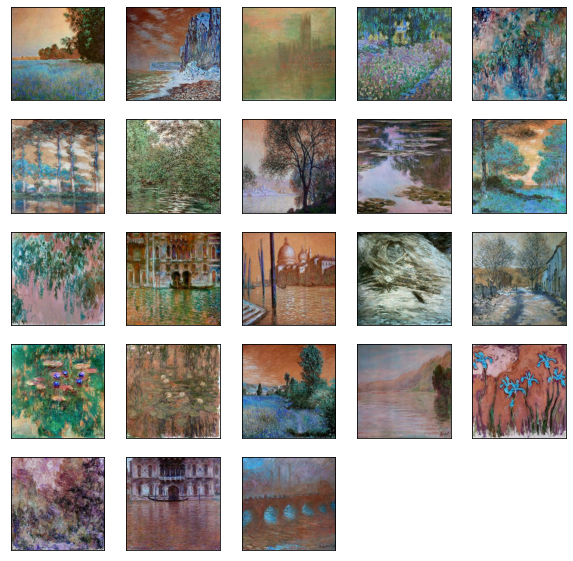

==========================CLASS 11 ===========================


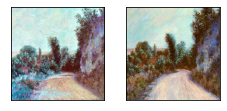

==========================CLASS 12 ===========================


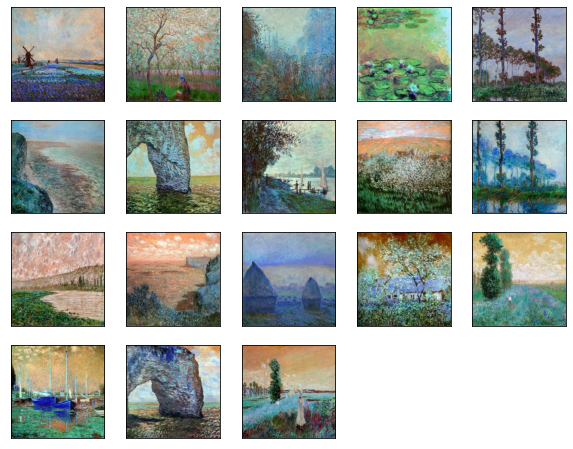

==========================CLASS 13 ===========================


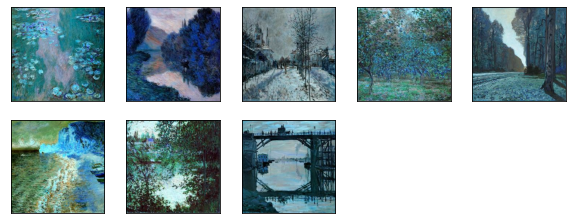

==========================CLASS 14 ===========================


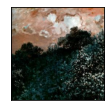

==========================CLASS 15 ===========================


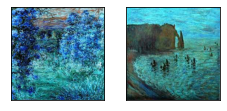

==========================CLASS 16 ===========================


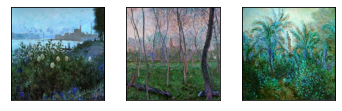

==========================CLASS 17 ===========================


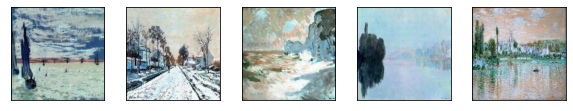

==========================CLASS 18 ===========================


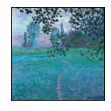

==========================CLASS 19 ===========================


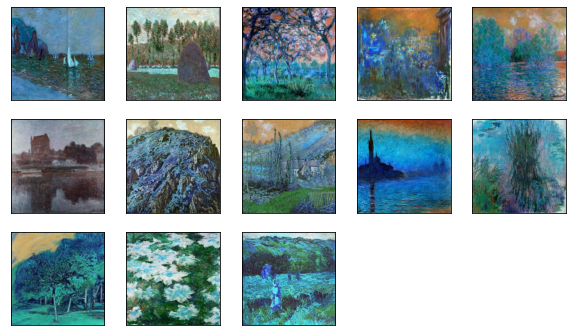

==========================CLASS 20 ===========================


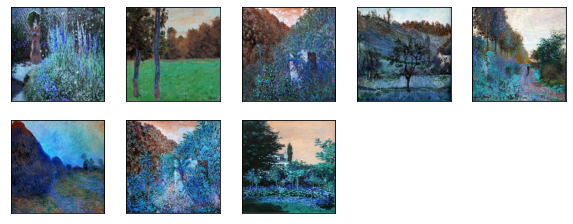

==========================CLASS 21 ===========================


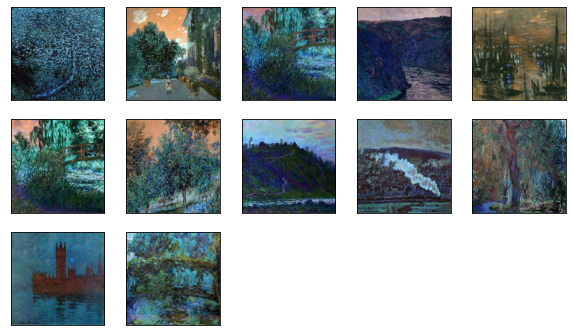

==========================CLASS 22 ===========================


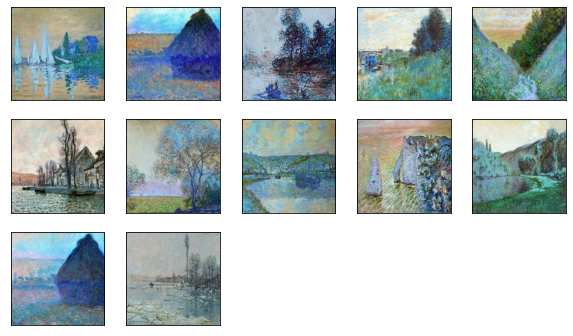

==========================CLASS 23 ===========================


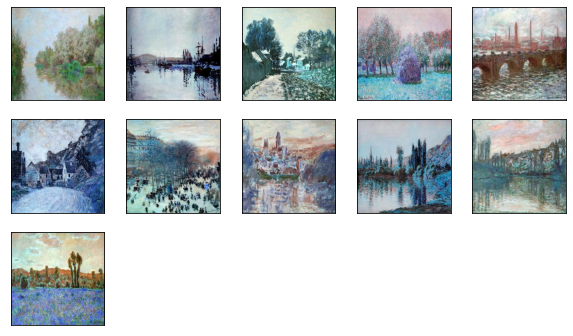

==========================CLASS 24 ===========================


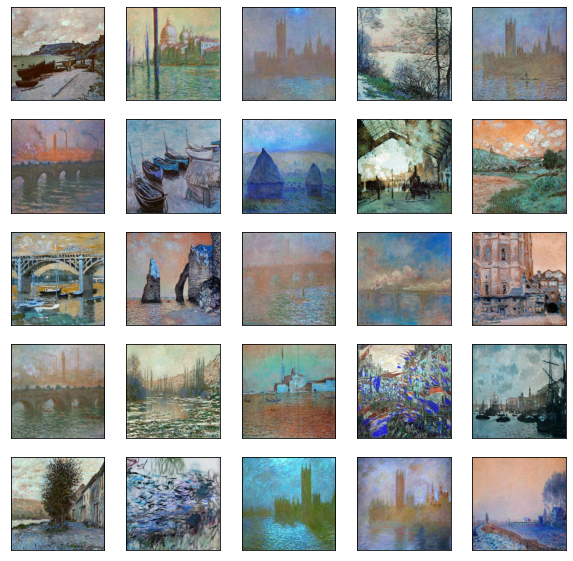

==========================CLASS 25 ===========================


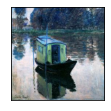

==========================CLASS 26 ===========================


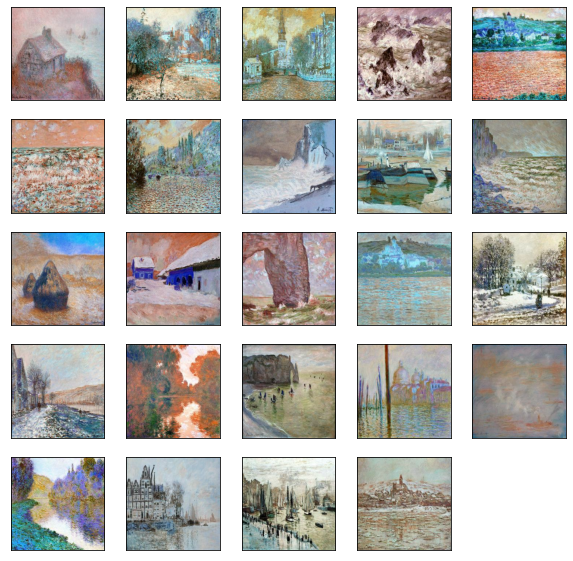

==========================CLASS 27 ===========================


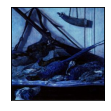

==========================CLASS 28 ===========================


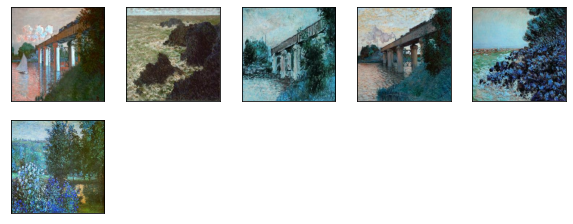

==========================CLASS 29 ===========================


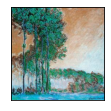

In [ ]:
import cv2
def display_images(images):
    plt.figure(figsize=(10,10))
    for i, img in enumerate(images):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img)
    plt.show()

def get_images(images_list):
    images = []
    for img_id in images_list:
        img = cv2.imread("/content/drive/MyDrive/deep_learning_project/data/monet_jpg/{}".format(img_id), cv2.COLOR_BGR2RGB)
        images.append(img)
    return images

for i in range(30):
    print(f'==========================CLASS {i} ===========================')
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    img = [filenames[j] for j in cluster_indices]
    images = get_images(img)
    #print(img)
    display_images(images[:25])

In [ ]:
# Get the closest images to the centroids
closest_images = []
closest_filenames = []
for i, centroid in enumerate(kmeans.cluster_centers_):
    distances = np.linalg.norm(X - centroid, axis=1)
    closest_image_index = np.argmin(distances)
    closest_images.append(images[closest_image_index])
    closest_filenames.append(filenames[closest_image_index])

# Copy the closest images to a different folder
destination_folder = '/content/drive/MyDrive/deep_learning_project/data/monet_jpg_color'
for i, closest_image in enumerate(closest_images):
    io.imsave(os.path.join(destination_folder, closest_filenames[i]), closest_image)


###Content Selection

In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from sklearn.cluster import KMeans

# Load images into a list
images = []
images_files = []

folder = "/content/drive/MyDrive/deep_learning_project/data/monet_jpg"
for filename in os.listdir(folder):
    if filename.endswith(".jpg"):
        img = cv2.imread(os.path.join(folder, filename))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(gray)
        #images.append(img)
        images_files.append(filename)

# Preprocess images
images = np.array(images) / 255.0

# Define a CNN model
model = tf.keras.models.Sequential([
    #tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu')
])

# Extract features from images using the CNN
features = model.predict(images)

# Cluster images based on the extracted features
kmeans = KMeans(n_clusters=30, random_state=0).fit(features)
cluster_labels = kmeans.predict(features)

10/10 [==============================] - 15s 1s/step


In [ ]:
import matplotlib.pyplot as plt

# Find closest images to the centroids
closest_images = []
closest_images_files = []
for i in range(30):
    centroid = kmeans.cluster_centers_[i]
    centroid = np.expand_dims(centroid, axis=0)
    closest_index = np.argmin(np.sum((features - centroid)**2, axis=1))
    closest_images.append(images[closest_index])
    closest_images_files.append(images_files[closest_index])

# Display closest images
for i, closest_image in enumerate(closest_images):
    plt.imshow(closest_image)
    plt.title(f"Closest Image to Centroid {i}")
    plt.show()


In [ ]:
closest_images_files

In [ ]:
import shutil
src_folder = "/content/drive/MyDrive/deep_learning_project/data/monet_jpg"
dst_folder = "/content/drive/MyDrive/deep_learning_project/data/monet_jpg_test_grey"
i = 0
for img_id in closest_images_files:
    src_path = os.path.join(src_folder, img_id)
    dst_path = os.path.join(dst_folder, img_id)
    shutil.copy2(src_path, dst_path)

###Furthest Images

In [ ]:
import os
import glob
from PIL import Image
import shutil

# set the path to the directory containing the images
path = '/content/drive/MyDrive/deep_learning_project/data/monet_jpg'

# set the path to the directory to copy the farthest images to
new_path = '/content/drive/MyDrive/deep_learning_project/data/monet_jpg_furthest'

# create the new directory if it doesn't already exist
if not os.path.exists(new_path):
    os.makedirs(new_path)

# get a list of all image files in the directory
image_files = glob.glob(os.path.join(path, '*.jpg'))

# create a list to store the distances of each image from the mean
distances = []

# open each image and calculate its distance from the mean image
for file in image_files:
    # open the image
    img = Image.open(file)

    # convert the image to grayscale
    img = img.convert('L')

    # calculate the distance of the image from the mean image
    distance = sum([abs(p-128) for p in img.getdata()]) / 65536.0

    # add the distance to the list
    distances.append(distance)

# get the indices of the 30 farthest images
farthest_indices = sorted(range(len(distances)), key=lambda i: distances[i], reverse=True)[:30]


In [ ]:
farthest_indices

In [ ]:
# copy the farthest images to the new directory
for i in farthest_indices:
    filename = os.path.basename(image_files[i])
    shutil.copy(image_files[i], os.path.join(new_path, filename))

###Image Augmentation

In [ ]:
!pip install imgaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imgaug.augmenters as iaa
import numpy as np
import cv2
import os

# Load your 30 images
images = []
folder = "/content/drive/MyDrive/deep_learning_project/data/monet_jpg_random"
for filename in os.listdir(folder):
    if filename.endswith(".jpg"):
        img = cv2.imread(os.path.join(folder, filename))
        images.append(img)

In [ ]:
len(images)

30

In [ ]:
images_aug = []

In [ ]:
# Define the augmentation pipeline
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontally flip 50% of the images
    # iaa.Affine(rotate=(-45, 45)),  # Rotate images by a random degree between -45 and 45
    iaa.AdditiveGaussianNoise(scale=(0, 0.05*255)),  # Add random noise to the images
    iaa.Multiply((0.8, 1.2))  # Adjust the brightness of the images
])

# # Apply the augmentation pipeline to the images
# images_aug.append(seq(images=images))

In [ ]:
images_aug

In [ ]:
len(images_aug)

In [ ]:
# Save the augmented images
dest = "/content/drive/MyDrive/deep_learning_project/data/monet_jpg_test_aug"

for i, image in enumerate(images):
    images_aug = seq(images=np.tile(image[np.newaxis, :, :, :], (5, 1, 1, 1)))
    for j, image_aug in enumerate(images_aug):
        cv2.imwrite(os.path.join(dest, "image_{}_aug_{}.jpg".format(i, j)), image_aug)


In [ ]:
# Load your 30 images
images_test = []
folder = "/content/drive/MyDrive/deep_learning_project/data/monet_jpg_test_aug"
for filename in os.listdir(folder):
    if filename.endswith(".jpg"):
        img = cv2.imread(os.path.join(folder, filename))
        images_test.append(img)

In [ ]:
len(images_test)

150

###Images To TFRec Files

In [ ]:
import numpy as np, pandas as pd, os
import matplotlib.pyplot as plt, cv2
import tensorflow as tf, re, math

In [ ]:
def decode_image(image, HEIGHT, WIDTH, CHANNELS):
    image = tf.image.decode_jpeg(image, channels=CHANNELS)
    image = (tf.cast(image, tf.float32) / 127.5) - 1
    image = tf.reshape(image, [HEIGHT, WIDTH, CHANNELS])
    return image

def read_tfrecord(example, HEIGHT, WIDTH, CHANNELS):
    tfrecord_format = {
        'image':      tf.io.FixedLenFeature([], tf.string),
    }
    example = tf.io.parse_single_example(example, tfrecord_format)
    image = decode_image(example['image'], HEIGHT, WIDTH, CHANNELS)
    return image

def load_dataset(filenames, HEIGHT, WIDTH, CHANNELS=3):
    dataset = tf.data.TFRecordDataset(filenames)
    dataset = dataset.map(lambda example: read_tfrecord(example, HEIGHT, WIDTH, CHANNELS), num_parallel_calls=AUTO)
    return dataset

def display_samples(ds, row, col):
    ds_iter = iter(ds)
    plt.figure(figsize=(15, int(15*row/col)))
    for j in range(row*col):
        example_sample = next(ds_iter)
        plt.subplot(row,col,j+1)
        plt.axis('off')
        plt.imshow(example_sample[0] * 0.5 + 0.5)
    plt.show()


def count_data_items(filenames):
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)


# Create TF Records
def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def serialize_example(image, name):
  feature = {
      'image': _bytes_feature(image),
  }
  example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
  return example_proto.SerializeToString()

In [ ]:
import random

PATH = '/content/drive/MyDrive/deep_learning_project/data/monet_jpg_content_grey/'
IMGS = os.listdir(PATH)
random.shuffle(IMGS)
SIZE = 30
IMAGE_SIZE = [256, 256]

print(f'Image samples: {len(IMGS)}')

Image samples: 30


In [ ]:
CT = len(IMGS)//SIZE + int(len(IMGS)%SIZE!=0)
for j in range(CT):
    print(); print('Writing TFRecord %i of %i...'%(j,CT))
    CT2 = min(SIZE,len(IMGS)-j*SIZE)
    with tf.io.TFRecordWriter('monet%.2i-%i.tfrec'%(j,CT2)) as writer:
        for k in range(CT2):
            img = cv2.imread(PATH+IMGS[SIZE*j+k])
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            img = cv2.imencode('.jpg', img, (cv2.IMWRITE_JPEG_QUALITY, 94))[1].tostring()
            name = IMGS[SIZE*j+k].split('.')[0]
            example = serialize_example(img, name)
            writer.write(example)
            if k%100==0: print(k,', ',end='')


Writing TFRecord 0 of 1...


<ipython-input-5-5fde1fd4718f>:9: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  img = cv2.imencode('.jpg', img, (cv2.IMWRITE_JPEG_QUALITY, 94))[1].tostring()


0 , 

###Visualization###

In [ ]:
loss_full = [5.1933, 3.527, 3.4998, 3.353, 3.2217, 3.1525, 3.1187, 3.1075, 3.0931, 3.0747, 3.0521, 3.008, 2.9533, 2.9094, 2.8781, 2.8336, 2.8004, 2.7642, 2.7283, 2.7043, 2.674, 2.665, 2.6527, 2.6473]

loss_content_grey = [ 5.1175, 4.9058, 5.0236, 5.0224, 4.7166, 4.4235, 4.1819, 4.0356, 3.9305, 3.8657, 3.8618, 3.8735, 3.7118, 3.6016, 3.6094, 3.6208, 3.6659, 3.6021, 3.5912, 3.5802, 3.6242, 3.5835, 3.587, 3.5986]

loss_content = [ 5.3377, 5.0484, 5.1481, 5.2153, 4.9467, 4.6709, 4.2967, 4.0777, 3.9233, 3.8232, 3.7441, 3.7285, 3.6803, 3.6795, 3.667, 3.7354, 3.7178, 3.78, 3.7787, 3.8179, 3.7945, 3.7751, 3.8068, 3.7826]

loss_color = [ 5.5416, 5.0617, 5.0833, 4.8883, 4.4934, 4.2992, 4.1711, 4.043, 3.8929, 3.6964, 3.6407, 3.6161, 3.579, 3.5717, 3.6164, 3.6187, 3.565, 3.5865, 3.6404, 3.6427, 3.6549, 3.7049, 3.6883, 3.6826]

loss_random = [ 5.8176, 5.4149, 5.3893, 5.1935, 4.8517, 4.5469, 4.4433, 4.2161, 3.9982, 3.852, 3.835, 3.7809, 3.7301, 3.7454, 3.7732, 3.8017, 3.7948, 3.7866, 3.8281, 3.829, 3.7962, 3.8495, 3.8108, 3.8054]

loss_content_grey_dup = [5.0271, 3.4382, 3.4191, 3.4478, 3.4135, 3.3327, 3.2213, 3.151, 3.1055, 3.0635, 3.0351, 2.9876, 2.9582, 2.9296, 2.9387, 2.9234, 2.8925, 2.9568, 2.9333, 2.9376, 3.003, 2.9877, 3.028, 3.162]

loss_furthest = [12.1672, 5.1043, 4.5114, 4.6256, 4.6942, 4.5962, 4.5224, 4.3901, 4.4244, 4.2409, 4.0767, 3.9344, 3.8171, 3.6977, 3.5802, 3.4829, 3.4805, 3.4029, 3.3344, 3.3061, 3.2807, 3.2253, 3.2138, 3.2242]

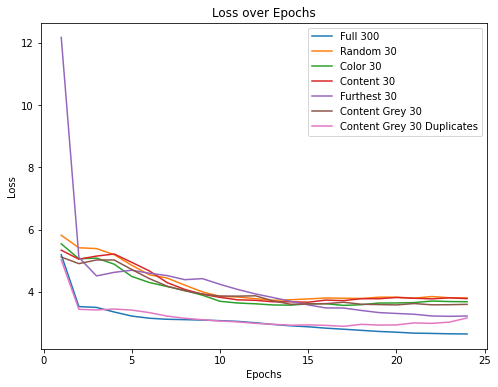

In [ ]:
import matplotlib.pyplot as plt

# Define the x-axis values
epochs = range(1, 25)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(epochs, loss_full, label='Full 300')
ax.plot(epochs, loss_random, label='Random 30')
ax.plot(epochs, loss_color, label='Color 30')
ax.plot(epochs, loss_content, label='Content 30')
ax.plot(epochs, loss_furthest, label='Furthest 30')
ax.plot(epochs, loss_content_grey, label='Content Grey 30')
ax.plot(epochs, loss_content_grey_dup, label='Content Grey 30 Duplicates')

# Set the plot title and axis labels
ax.set_title('Loss over Epochs')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()


###Util

In [ ]:
import re

filename = '/content/drive/MyDrive/deep_learning_project/results/furthest30/CycleGAN/log.txt'
monet_gen_loss_array = []

with open(filename, 'r') as f:
    lines = f.readlines()
    for line in lines:
        match = re.search(r'monet_gen_loss: (\d+\.\d+)', line)
        if match:
            loss_value = float(match.group(1))
            monet_gen_loss_array.append(loss_value)


In [ ]:
monet_gen_loss_array

[12.1672,
 5.1043,
 4.5114,
 4.6256,
 4.6942,
 4.5962,
 4.5224,
 4.3901,
 4.4244,
 4.2409,
 4.0767,
 3.9344,
 3.8171,
 3.6977,
 3.5802,
 3.4829,
 3.4805,
 3.4029,
 3.3344,
 3.3061,
 3.2807,
 3.2706,
 3.2253,
 3.2138,
 3.2242]

In [ ]:
from PIL import Image
import os

# Define the input and output directories
input_dir = "/path/to/input/dir"
output_dir = "/path/to/output/dir"

# Define the new size for the images
new_size = (320, 320)

# Loop through all the files in the input directory
for filename in os.listdir(input_dir):
    # Open the image file
    with Image.open(os.path.join(input_dir, filename)) as img:
        # Resize the image
        img_resized = img.resize(new_size)

        # Save the resized image to the output directory
        img_resized.save(os.path.join(output_dir, filename))
